# Eric Harrison

## Research question/interests

**Which NHL team drafts the most successful NHL players?**
     
    I plan to answer this question by comparing the games played and points of all players drafted to find which teams have the best drafting history.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
# And we're going to remove the top and right axis lines
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

In [ ]:
df = pd.read_csv("../data/raw/NHLDraft.csv")
df

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,12246,1963,17,Toronto Maple Leafs,Jim McKenny,CA,D,16.0,1979.0,Toronto Neil McNeil Maroons (MetJAHL),...,329.0,-4.0,294.0,NaN,NaN,NaN,NaN,NaN,NaN,53.7
12246,12247,1963,18,Montreal Canadiens,Glen Shirton,CA,D,NaN,NaN,Port Colborne Midgets (),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12247,12248,1963,19,Boston Bruins,Jim Blair,CA,F,NaN,NaN,Georgetown Midgets (OHA-Jr.),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,12249,1963,20,New York Rangers,Campbell Alleson,CA,D,NaN,NaN,Portage la Prairie Jr. (),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Creating a dataframe from 1982 - present, to remove some teams that don't exist anymore
#and to balance stats from the original 6 teams that naturally have a lot more drafted players
df1982 = df.loc[:9928]
df1982['team'].unique()

array(['Montreal Canadiens', 'New Jersey Devils', 'Arizona Coyotes',
       'Seattle Kraken', 'Philadelphia Flyers', 'Columbus Blue Jackets',
       'Chicago Blackhawks', 'Detroit Red Wings', 'Buffalo Sabres',
       'Anaheim Ducks', 'Winnipeg Jets', 'Vancouver Canucks',
       'Nashville Predators', 'Dallas Stars', 'Minnesota Wild',
       'Washington Capitals', 'Pittsburgh Penguins', 'St. Louis Blues',
       'San Jose Sharks', 'Tampa Bay Lightning', 'Edmonton Oilers',
       'Toronto Maple Leafs', 'Vegas Golden Knights', 'Los Angeles Kings',
       'Boston Bruins', 'Calgary Flames', 'Carolina Hurricanes',
       'New York Rangers', 'Ottawa Senators', 'New York Islanders',
       'Florida Panthers', 'Colorado Avalanche', 'Phoenix Coyotes',
       'Atlanta Thrashers', 'Hartford Whalers', 'Quebec Nordiques',
       'Minnesota North Stars'], dtype=object)

<seaborn.axisgrid.FacetGrid>

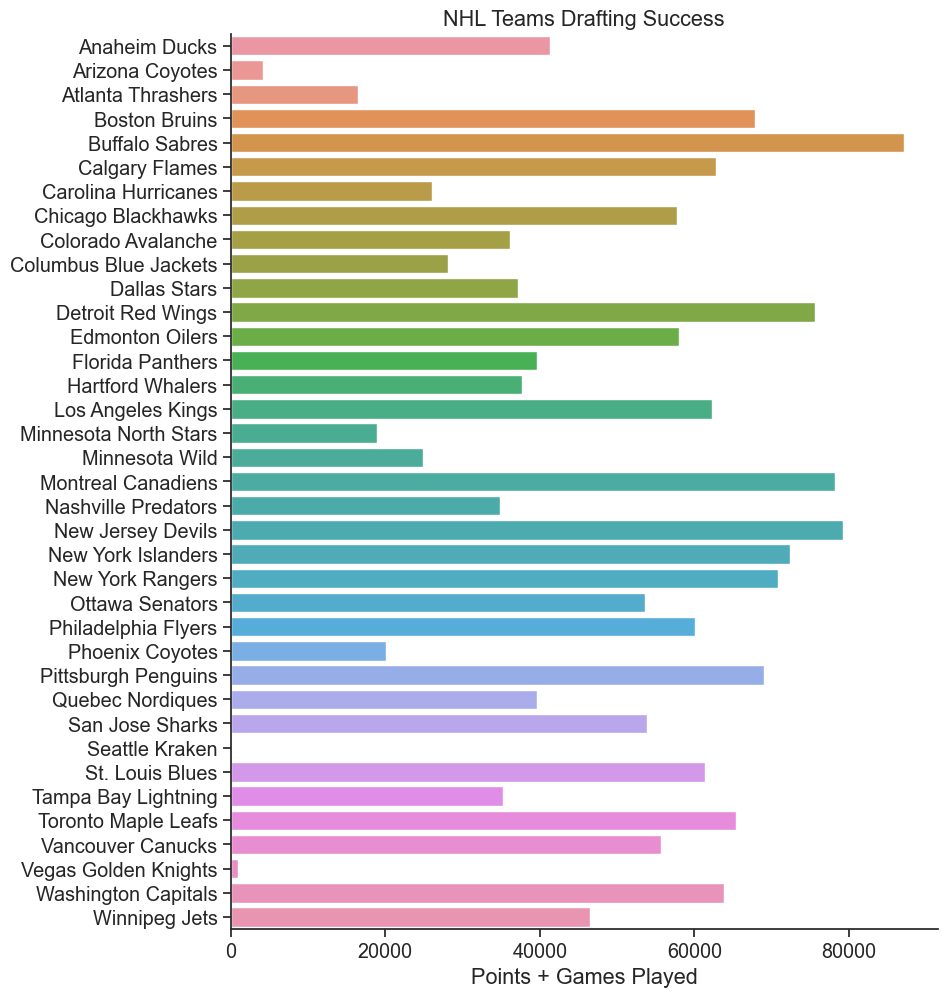

In [ ]:
#Dropping all the stats that I don't need for this question
df1982 = df.loc[:9928]
df1982 = df1982.drop(['id', 'year', 'age', 'plus_minus', 'penalties_minutes', 'goalie_games_played',
                      'goalie_wins', 'goalie_losses', 'nationality', 'position', 'to_year', 'amateur_team',
                     'goalie_ties_overtime', 'save_percentage', 'goals_against_average', 'point_shares'], axis=1)
dfByTeam = df1982
dfByTeam['score'] = dfByTeam['games_played'] + dfByTeam['points']
dfByTeam=dfByTeam.groupby(["team"]).sum(numeric_only=True)
dfByTeam['team'] = dfByTeam.index

sns.catplot(dfByTeam, x='score', y='team', height=10, kind='bar', errorbar=None).set(
    title='NHL Teams Drafting Success', ylabel=None, xlabel='Points + Games Played')

 This graph shows that the Buffalo Sabres have been noticeably better than the rest of the teams with 
 their drafting. They're followed by the New Jersey Devils, Montreal Canadiens and Detroit Red Wings, while
 the rest of the league is all quite similar. There are quite a few teams that haven't been in the league for
 the entirety of 1982 - present, so they naturally have a much lower drafting score as they haven't drafted as
 many players

<Figure size 1000x1000 with 0 Axes>

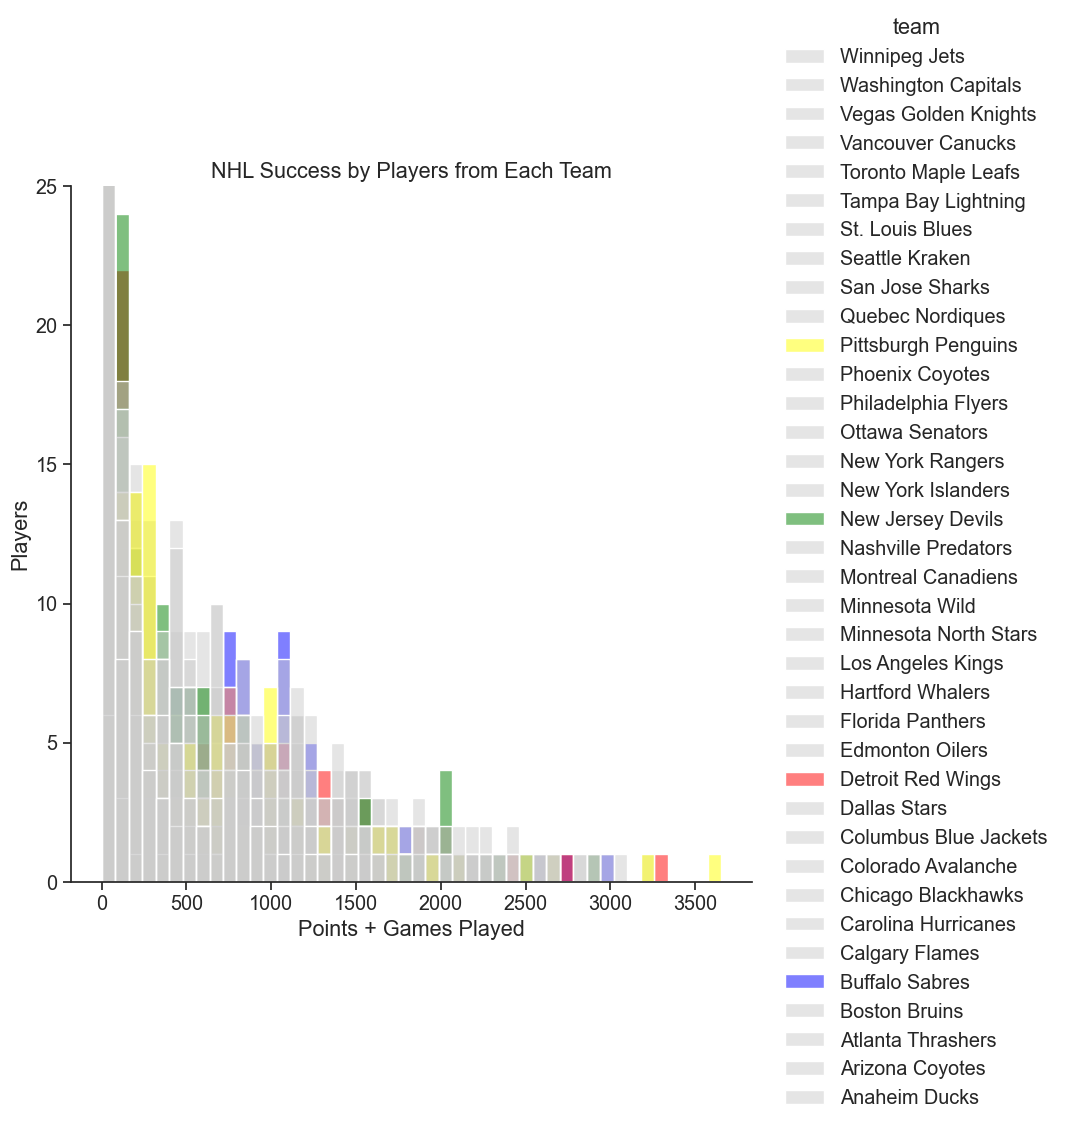

In [ ]:
fig = plt.figure(figsize=(10,10))
dfAllPlayed = df1982.dropna()

#Creating new palette to highlight specific teams
cols = []
for i in range(37):
    cols.append((0.8, 0.8, 0.8))
cols[10] = 'Yellow'
cols[16] = 'Green'
cols[25] = 'Red'
cols[32] = 'Blue'

dfAllPlayed = dfAllPlayed.sort_values(by=['team','games_played'], ascending=False)
sns.displot(dfAllPlayed, x="score", hue="team", stat="count", common_norm=False, height=8, aspect=1, palette=cols)
plt.title("NHL Success by Players from Each Team")
plt.xlabel("Points + Games Played")
plt.ylabel("Players")
plt.ylim(0, 25)
#plt.xlim(60)
plt.show()

Looking at the number of players at each score by some of the better teams we can get
an idea of what makes their drafting better. For example, the Buffalo Sabres have a much
larger amount of players in the 750-1250 score range than other teams. It's also interesting
that the Pittsburgh Penguins drafted both Mario Lemieux and Jaromir Jagr, who are 1st and 3rd
overall of all players drafted, yet the team is still very average with their overall drafting.
With this in mind, it seems that a higher team drafting success relies more on drafting lots of
average players, with fewer bad players than it relies on drafting the few very extremely successful players.

<seaborn.axisgrid.FacetGrid>

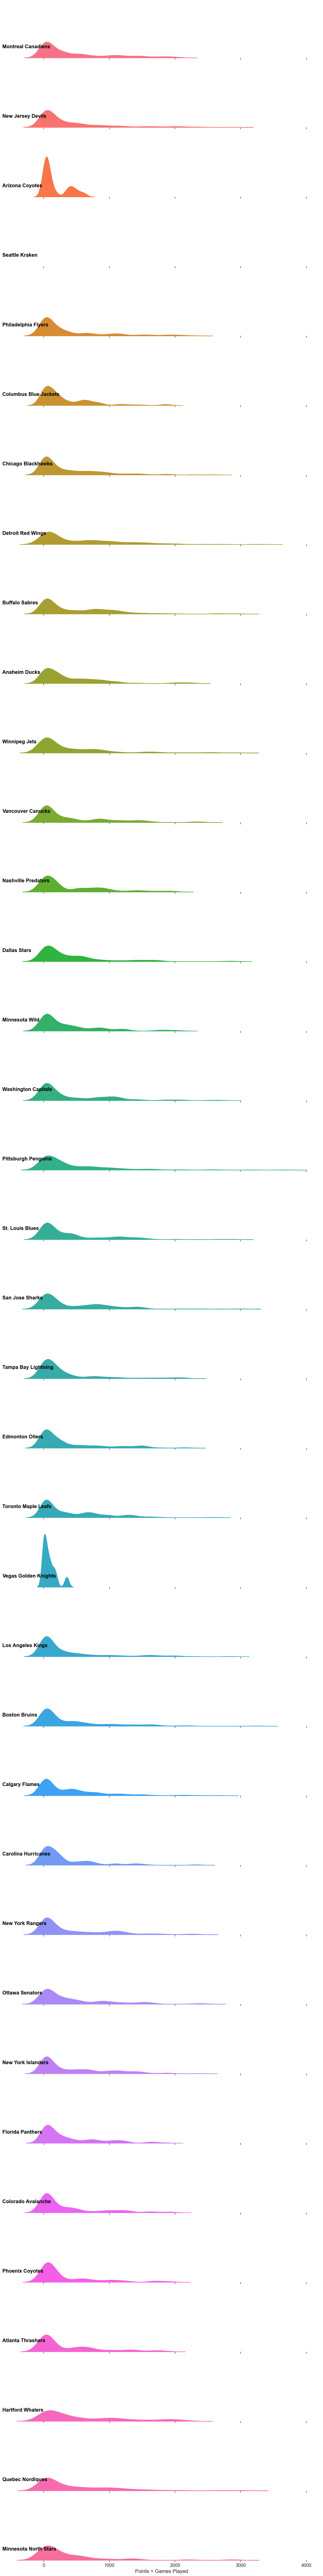

In [ ]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df1982, row="team", hue="team", aspect=5, height=3)

# Draw the densities in a few steps
g.map(sns.kdeplot, "score",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5, warn_singular=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color="Black",
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "score")

# Remove axes details
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Points + Games Played")
g.despine(bottom=True, left=True)

This graph better shows the distribution of players succes by each team. Unsurprisingly, the vast majority of players drafted don't have much success in the NHL. Once again, it appears that the better teams at drafting have less players without NHL success and slightly more players around the middle of the graph, while the most successful player doesn't have a large affect on team success.